## K-means algorithm
Based on Andrew Ng lectures


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

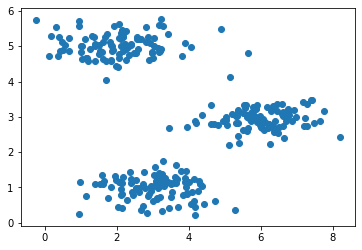

In [60]:
rawdata = sio.loadmat('data2ex7',mat_dtype=True)
X = rawdata['X']
plt.scatter(X[:,0],X[:,1])

In [155]:
def RandInitCentroids(X,K):
    randomIdx = np.random.permutation(X.shape[0])
    centroids = X[randomIdx[0:K],:]
    return centroids
    
def FindClosesestCentroids(X,Centr):
    K = Centr.shape[0]
    d = np.zeros((X.shape[0],K))
    for i in range(0,K):
        d[:,i] = np.linalg.norm(X - Centr[i,:],axis=1)**2
    idx = np.argmin(d,axis=1)
    return idx

def ComputeCentroids(X,idx,K):
    m,n = X.shape
    Centroids = np.zeros((K,n))
    for i in range(0,K):
        Centroids[i,:] = np.mean(X[idx==i],axis=0)
    return Centroids

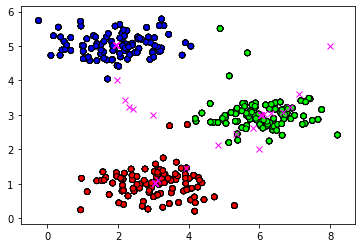

In [157]:
K = 3
MaxIter = 10

centroids = np.array([[3, 3], [6, 2], [8, 5]])
# centroids = RandInitCentroids(X,K)
AllCentroids = [centroids]
for i in range(0,MaxIter):
    
    idx = FindClosesestCentroids(X,centroids)
    
    centroids = ComputeCentroids(X,idx,K)
    plt.scatter(X[:, 0], X[:, 1], c=idx, zorder=10, cmap=plt.cm.brg,
                edgecolor='k', s=30)
    AllCentroids.append(centroids)
#     plt.scatter(centroids[:,0],centroids[:,1],zorder=20,color='black',marker='x')

# print(AllCentroids)
for Centr in AllCentroids:
    for j in range(0,3):
        plt.plot(Centr[j][0],Centr[j][1],zorder=10,color='fuchsia',marker='x')
        

## Use K-means to compress an image

(16384,)


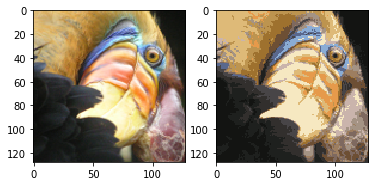

In [190]:
import cv2
img = cv2.imread('bird_small.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
# print(img[11,11,1])
imgr = img.reshape((img.shape[0]*img.shape[1],3))
# print(imgr)

K = 16
MaxIter = 10

centroids = RandInitCentroids(imgr,K)
for i in range(0,MaxIter):
    
    idx = FindClosesestCentroids(imgr,centroids)
    
    centroids = ComputeCentroids(imgr,idx,K)

idx = FindClosesestCentroids(imgr,centroids)
NewX = centroids[idx,:]
NewX = NewX.reshape((img.shape[0],img.shape[1],3))

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(NewX)